# IMPORTING SOCIOECONOMIC DATA


all columns are filtered following the latest discussion on this sheet https://docs.google.com/spreadsheets/d/1LuOSzp74Zpo2Ia5-hvkZttRqjB2uiZJeo8-9PqXv5TE/edit#gid=422100960 

In [ ]:
from google.colab import drive
import os

# Mounting Google Drive
drive.mount('/content/drive')

# Defining the path to the shared folder
folder_path = '/content/drive/MyDrive/ML_Final_Project/'

# Changing the current working directory to the shared folder
os.chdir(folder_path)

# Checking if the current working directory has been changed
!pwd

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1MwoZzy3EtPhm3O8B7qy4O67oLGRVkCzq/ML_Final_Project


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm #normal
from scipy.stats import genextreme as gev #generalized extreme value
from scipy.stats import pareto #pareto
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [ ]:
### RUN ONLY IF USING GOOGLE COLAB ###
#check available folders

folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

print(f"Available folders under {folder_path}:")
for f in folders:
    print(f)

Available folders under /content/drive/MyDrive/ML_Final_Project/:
Data Analysis
Datasets


In [ ]:
soc16 = pd.read_excel('Datasets/ACS/soc_2016acs5yr_puma.xlsx')
dem16 = pd.read_excel('Datasets/ACS/demo_2016acs5yr_puma.xlsx')
hou16 = pd.read_excel('Datasets/ACS/hous_2016acs5yr_puma.xlsx')
eco16 = pd.read_excel('Datasets/ACS/econ_2016acs5yr_puma.xlsx')

soc17 = pd.read_excel('Datasets/ACS/soc_2017_acs5yr_puma.xlsx')
dem17 = pd.read_excel('Datasets/ACS/demo_2017_acs5yr_puma.xlsx')
hou17 = pd.read_excel('Datasets/ACS/hous_2017_acs5yr_puma.xlsx')
eco17 = pd.read_excel('Datasets/ACS/econ_2017_acs5yr_puma.xlsx')

soc18 = pd.read_excel('Datasets/ACS/soc_2018_acs5yr_puma.xlsx')
dem18 = pd.read_excel('Datasets/ACS/demo_2018_acs5yr_puma.xlsx')
hou18 = pd.read_excel('Datasets/ACS/hous_2018_acs5yr_puma.xlsx')
eco18 = pd.read_excel('Datasets/ACS/econ_2018_acs5yr_puma.xlsx')

soc19 = pd.read_excel('Datasets/ACS/soc_2019_acs5yr_cdta.xlsx')
dem19 = pd.read_excel('Datasets/ACS/demo_2019_acs5yr_cdta.xlsx')
hou19 = pd.read_excel('Datasets/ACS/hous_2019_acs5yr_cdta.xlsx')
eco19 = pd.read_excel('Datasets/ACS/econ_2019_acs5yr_cdta.xlsx')

In [ ]:
def merge_df(df1, df2, df3, df4):

       
    df1 = df1[['GeoID', 'Borough', 'HOVacRtE', 'RntVacRtE', 'OOcHU1P', 'ROcHU1P', 'MdVlE', 'GRPI35plP']]
    
    df2 = df2[['GeoID', 'FamChU18P', 'AvgHHSzE', 'EA_BchDHP', 'NtvUSP', 'EngOnly1P', 'LgOEng1P', 'LgOEnLEP1P']] 
    
    df3 = df3[['GeoID','CvEm16pl1P', 'MdHHIncE', 'PBwPvP']]
    df4 = df4[['GeoID', 'Pop_1E', 'FemP', 'MdAgeE']]
    
    df = df1.merge(df2, on='GeoID')
    df = df.merge(df3, on='GeoID')
    df = df.merge(df4, on='GeoID')

    df = df[['GeoID', 'Borough', 'HOVacRtE', 'RntVacRtE', 'OOcHU1P',
       'ROcHU1P', 'MdVlE', 'GRPI35plP', 'FamChU18P', 'AvgHHSzE', 'EA_BchDHP',
       'NtvUSP', 'EngOnly1P', 'LgOEng1P', 'LgOEnLEP1P', 'CvEm16pl1P',
       'MdHHIncE', 'PBwPvP', 'FemP', 'MdAgeE']]
    
    return df

In [ ]:
def merge_df16(df1,df2,df3,df4):
    df1 = df1[['GeoID', 'Borough', 'HOVacRtE', 'RntVacRtE', 'OOcHU1P', 'ROcHUP', 'MdVlE', 'GRPI35plP']]
    df2 = df2[['GeoID', 'FamChU18P', 'AvgHHSzE', 'EA_BchDHP', 'NtvUSP', 'EngOnly1P', 'LgOEng1P', 'LgOEnLEP1P']]
    df3 = df3[['GeoID','CvEm16pl1P', 'MdHHIncE', 'PBwPvP']]
    df4 = df4[['GeoID', 'FemP', 'MdAgeE']]

    df = df1.merge(df2, left_on='GeoID', right_on='GeoID')
    df = df.merge(df3, left_on='GeoID', right_on='GeoID')
    df = df.merge(df4,left_on='GeoID', right_on='GeoID')
    
    return df

In [ ]:
df16 = merge_df16(hou16, soc16, eco16, dem16)
df17 = merge_df(hou17, soc17, eco17, dem17)
df18 = merge_df(hou18, soc18, eco18, dem18)
df19 = merge_df(hou19, soc19, eco19, dem19)

In [ ]:
df16['Year'] = '2016'
df17['Year'] = '2017'
df18['Year'] = '2018'
df19['Year'] = '2019'

In [ ]:
df16 = df16.rename(columns = {'ROcHUP':'ROcHU1P'})

In [ ]:
# append all dataframes vertically
all_data = pd.concat([df16, df17, df18, df19], axis=0, ignore_index=False)

In [ ]:
all_data.head(2)

,GeoID,Borough,HOVacRtE,RntVacRtE,OOcHU1P,ROcHU1P,MdVlE,GRPI35plP,FamChU18P,AvgHHSzE,EA_BchDHP,NtvUSP,EngOnly1P,LgOEng1P,LgOEnLEP1P,CvEm16pl1P,MdHHIncE,PBwPvP,FemP,MdAgeE,Year
0,3701,Bronx,1.7,2.5,31.6,68.4,282100.0,43.8,28.8,2.50,39.5,61.7,46.5,53.5,20.6,57.4,58409.0,18.2,52.7,37.6,2016
1,3702,Bronx,2.2,4.0,36.9,63.1,397000.0,50.4,31.0,2.98,22.8,55.0,72.1,27.9,9.0,55.7,47168.0,19.4,54.2,35.9,2016


In [ ]:
all_data.columns

Index(['GeoID', 'Borough', 'HOVacRtE', 'RntVacRtE', 'OOcHU1P', 'ROcHU1P',
       'MdVlE', 'GRPI35plP', 'FamChU18P', 'AvgHHSzE', 'EA_BchDHP', 'NtvUSP',
       'EngOnly1P', 'LgOEng1P', 'LgOEnLEP1P', 'CvEm16pl1P', 'MdHHIncE',
       'PBwPvP', 'FemP', 'MdAgeE', 'Year'],
      dtype='object')

<ipython-input-14-67d57f2ab5d1>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = corrdf.corr()


<Axes: >

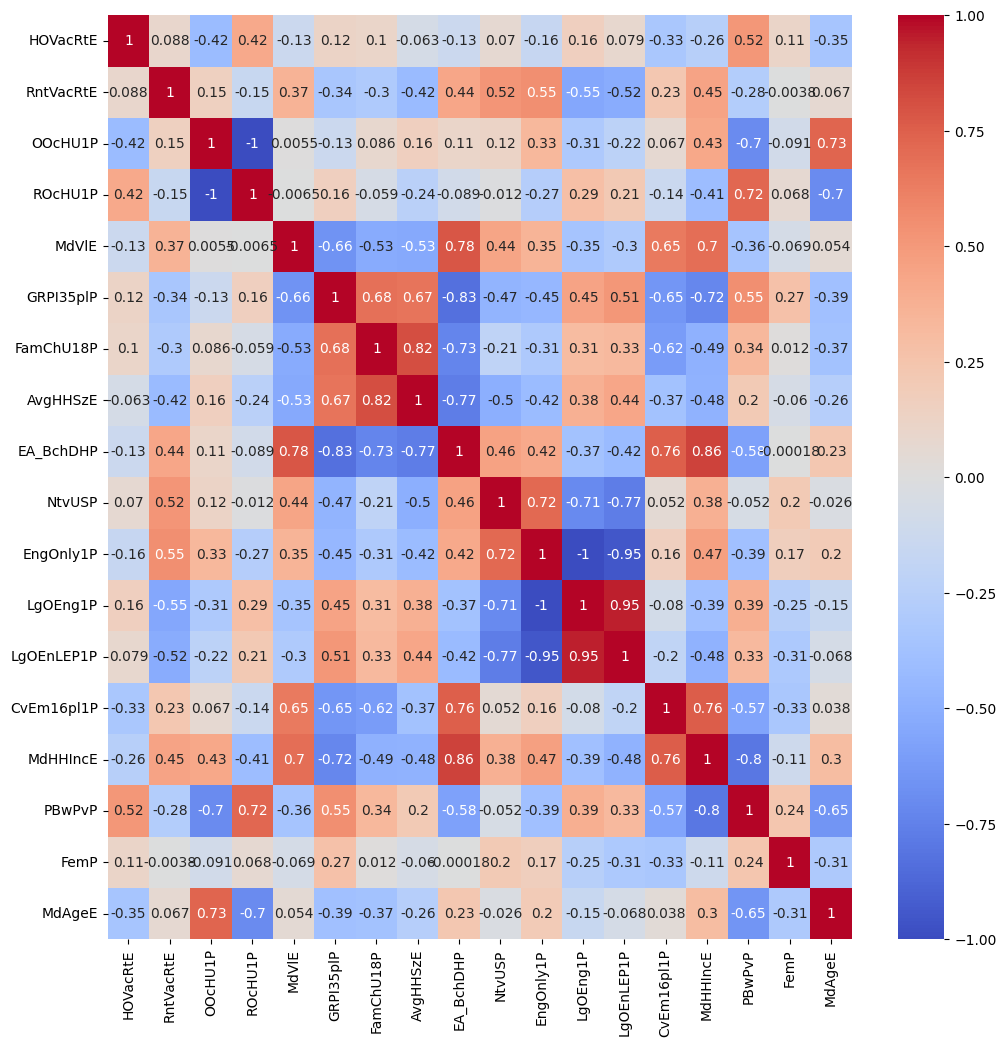

In [ ]:
corrdf = all_data.copy()
corrdf = corrdf.drop(columns = ['GeoID','Borough'])



# create a figure object and adjust the size
fig, ax = plt.subplots(figsize=(12, 12))

# plot the 
corr_matrix = corrdf.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center = 0,  ax=ax)

#need to drop several variable from the same topic

In [ ]:
#removing columns with multicollinearity
all_data = all_data.drop(columns = ['ROcHU1P','LgOEng1P', 'LgOEnLEP1P'])


<ipython-input-16-67d57f2ab5d1>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = corrdf.corr()


<Axes: >

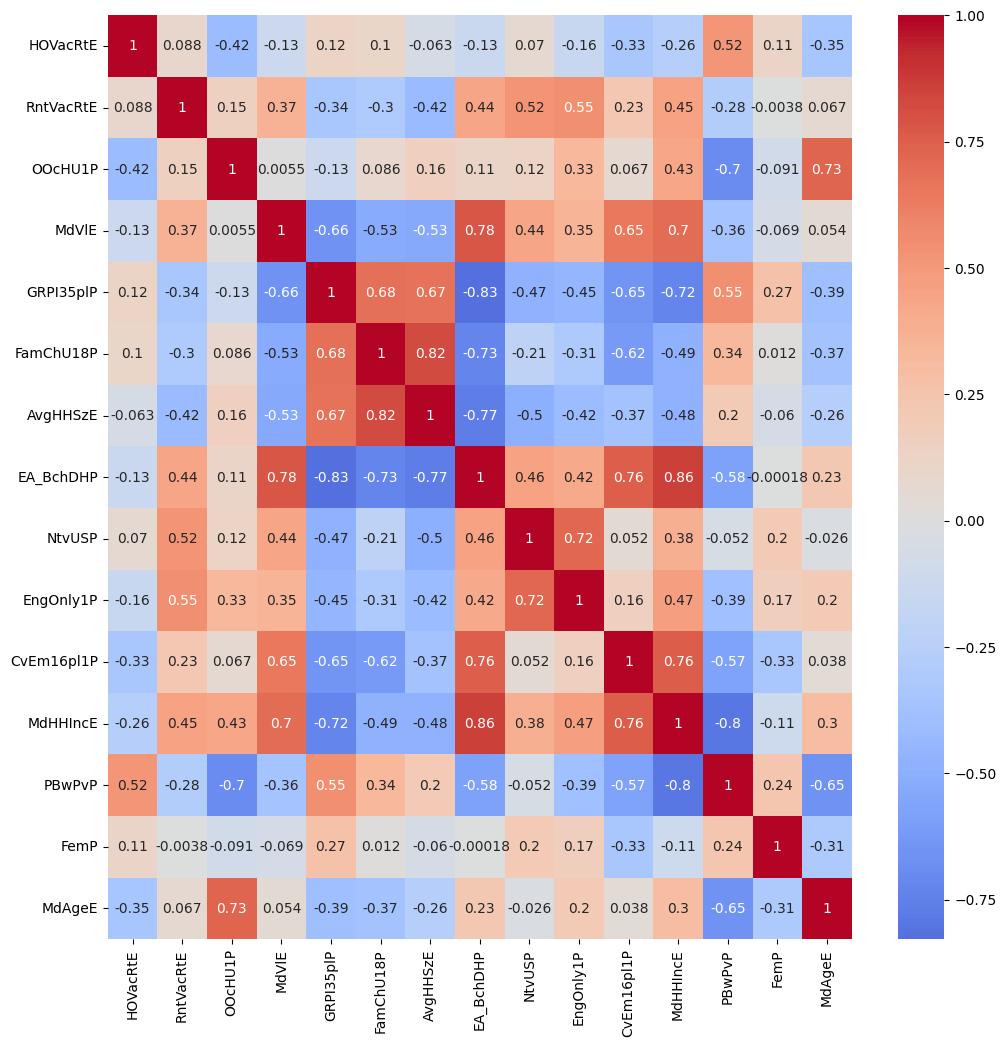

In [ ]:
corrdf = all_data.copy()
corrdf = corrdf.drop(columns = ['GeoID','Borough'])



# create a figure object and adjust the size
fig, ax = plt.subplots(figsize=(12, 12))

# plot the 
corr_matrix = corrdf.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center = 0,  ax=ax)

#need to drop several variable from the same topic

In [ ]:
all_data.head(2)

,GeoID,Borough,HOVacRtE,RntVacRtE,OOcHU1P,MdVlE,GRPI35plP,FamChU18P,AvgHHSzE,EA_BchDHP,NtvUSP,EngOnly1P,CvEm16pl1P,MdHHIncE,PBwPvP,FemP,MdAgeE,Year
0,3701,Bronx,1.7,2.5,31.6,282100.0,43.8,28.8,2.50,39.5,61.7,46.5,57.4,58409.0,18.2,52.7,37.6,2016
1,3702,Bronx,2.2,4.0,36.9,397000.0,50.4,31.0,2.98,22.8,55.0,72.1,55.7,47168.0,19.4,54.2,35.9,2016


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select columns to scale
cols_to_scale = [	'MdHHIncE', 'MdVlE', 'AvgHHSzE']

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform selected columns
all_data[cols_to_scale] = scaler.fit_transform(all_data[cols_to_scale])


In [ ]:
all_data['MdHHIncE'] = all_data['MdHHIncE']*100
all_data['MdVlE'] = all_data['MdVlE']*100
all_data['AvgHHSzE'] = all_data['AvgHHSzE']*100

## Bringing in Tonnage Data

In [ ]:

data = pd.read_csv('/content/drive/MyDrive/ML_Final_Project/Datasets/DSNY_Monthly_Tonnage_Data.csv')
data.head(2)

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
0,1990 / 08,Manhattan,03,3258.3,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1990 / 10,Manhattan,03,3829.9,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
data = data.rename(columns={'MONTH': 'DATE'})
data['DATE'] = pd.to_datetime(data['DATE'])
data['DATE'] = data['DATE'].dt.to_period('M')
data['YEAR'] = data['DATE'].dt.year
data['MONTH'] = data['DATE'].dt.month

#Filtering by Organic Residual only
selcols = ['DATE', 'YEAR', 'MONTH', 'BOROUGH', 'COMMUNITYDISTRICT', 'RESORGANICSTONS', 'SCHOOLORGANICTONS', 
           'LEAVESORGANICTONS', 'XMASTREETONS', 'BOROUGH_ID']
data = data[selcols]
data = data.fillna(0)

#Adding Boro Code for future use at merging with other data sets
data = data[pd.to_numeric(data['COMMUNITYDISTRICT'], errors='coerce').notnull()]
data['COMMUNITYDISTRICT'] = data['COMMUNITYDISTRICT'].astype(dtype=int, errors='raise')
data['BORO_CD']=(data['BOROUGH_ID']*100)+data['COMMUNITYDISTRICT']
data['BORO_CD']=data['BORO_CD'].astype(int)

In [ ]:
#Adding total tons of Organics Collected from the different categories
data['TOTALORGANICS'] = data[['RESORGANICSTONS', 'SCHOOLORGANICTONS', 
           'LEAVESORGANICTONS', 'XMASTREETONS']].sum(axis=1)

In [ ]:
#Aggregating the data by year to understand the total tonnages and filter the data with the most relevant years of collection
data_year = data.groupby(by=['YEAR', 'BORO_CD']).sum()[['TOTALORGANICS']].reset_index()
data_year = data_year.rename(columns={'TOTALORGANICS':'TOTAL TONS'})

<ipython-input-23-73ba8b90abf0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_year = data.groupby(by=['YEAR', 'BORO_CD']).sum()[['TOTALORGANICS']].reset_index()


In [ ]:
#Filtering the data from 2016 to 2023
data_year = data_year[(data_year['YEAR'] >= 2016) & (data_year['YEAR'] <= 2019)]
data_year.head(2)

,YEAR,BORO_CD,TOTAL TONS
1497,2016,101,189.5
1498,2016,102,190.2


In [ ]:
all_data['GeoID'] = all_data['GeoID'].astype('string')

df = all_data.copy()

In [ ]:
all_data.dtypes

GeoID          string
Borough        object
HOVacRtE      float64
RntVacRtE     float64
OOcHU1P       float64
MdVlE         float64
GRPI35plP     float64
FamChU18P     float64
AvgHHSzE      float64
EA_BchDHP     float64
NtvUSP        float64
EngOnly1P     float64
CvEm16pl1P    float64
MdHHIncE      float64
PBwPvP        float64
FemP          float64
MdAgeE        float64
Year           object
dtype: object

In [ ]:
df['BORO_CD'] = np.where(df['Borough'].isin(['Manhattan']), ('1' + df['GeoID'].str[-2:]),
                np.where(df['Borough'].isin(['Bronx']), ('2' + df['GeoID'].str[-2:]),
                np.where(df['Borough'].isin(['Brooklyn']), ('3' + df['GeoID'].str[-2:]),
                np.where(df['Borough'].isin(['Queens']), ('4' + df['GeoID'].str[-2:]), ('5' + df['GeoID'].str[-2:])
))))  
df.head(2)

,GeoID,Borough,HOVacRtE,RntVacRtE,OOcHU1P,MdVlE,GRPI35plP,FamChU18P,AvgHHSzE,EA_BchDHP,NtvUSP,EngOnly1P,CvEm16pl1P,MdHHIncE,PBwPvP,FemP,MdAgeE,Year,BORO_CD
0,3701,Bronx,1.7,2.5,31.6,6.959959,43.8,28.8,43.315508,39.5,61.7,46.5,57.4,23.465152,18.2,52.7,37.6,2016,201
1,3702,Bronx,2.2,4.0,36.9,16.130822,50.4,31.0,68.983957,22.8,55.0,72.1,55.7,17.389001,19.4,54.2,35.9,2016,202


In [ ]:
df['Year'] = df['Year'].astype('int')
df['BORO_CD'] = df['BORO_CD'].astype('int')

In [ ]:
merge = df.merge(data_year, left_on=['BORO_CD', 'Year'], right_on = ['BORO_CD', 'YEAR'], how='inner')
merge.head()

,GeoID,Borough,HOVacRtE,RntVacRtE,OOcHU1P,MdVlE,GRPI35plP,FamChU18P,AvgHHSzE,EA_BchDHP,NtvUSP,EngOnly1P,CvEm16pl1P,MdHHIncE,PBwPvP,FemP,MdAgeE,Year,BORO_CD,YEAR,TOTAL TONS
0,3701,Bronx,1.7,2.5,31.6,6.959959,43.8,28.8,43.315508,39.5,61.7,46.5,57.4,23.465152,18.2,52.7,37.6,2016,201,2016,6.8
1,3702,Bronx,2.2,4.0,36.9,16.130822,50.4,31.0,68.983957,22.8,55.0,72.1,55.7,17.389001,19.4,54.2,35.9,2016,202,2016,9.0
2,3703,Bronx,1.4,1.5,44.6,11.900572,38.6,24.4,43.850267,25.6,71.9,61.1,53.6,22.501919,12.0,54.1,42.9,2016,203,2016,2.1
3,3704,Bronx,1.8,2.6,28.4,18.948328,46.9,32.0,63.101604,23.8,56.8,42.7,55.0,17.652242,20.5,51.7,36.0,2016,204,2016,12.4
4,3705,Bronx,5.3,2.6,7.2,13.903954,51.6,37.5,65.240642,13.1,60.3,36.0,46.2,4.709138,42.7,53.6,29.0,2016,205,2016,7.6


In [ ]:
merge = merge.drop(columns = ['GeoID', 'Borough'])

In [ ]:
#separating into training and test data. Training data will be taken from years 2016, 2017, and 2018 and 2019 will be used to test
train_data = merge[merge['YEAR'].isin([2016, 2017, 2018])]

test_data = merge[merge['YEAR'] == 2019]

In [ ]:
train_data = train_data.drop(columns = ['Year', 'YEAR', 'BORO_CD', 'TOTAL TONS'])
test_data = test_data.drop(columns = ['Year', 'YEAR', 'BORO_CD', 'TOTAL TONS'])

In [ ]:
# Loop through each value of k and compute the silhouette score
k_values = range(2, 11)
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(train_data)
    silhouette_scores.append(silhouette_score(train_data, cluster_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
silhouette_scores

[0.4600901977947205,
 0.2892230360712941,
 0.3237769715972399,
 0.3261605127338121,
 0.35557978010036434,
 0.3492942872649163,
 0.34719878416298805,
 0.33963779991915405,
 0.3393480688462895]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

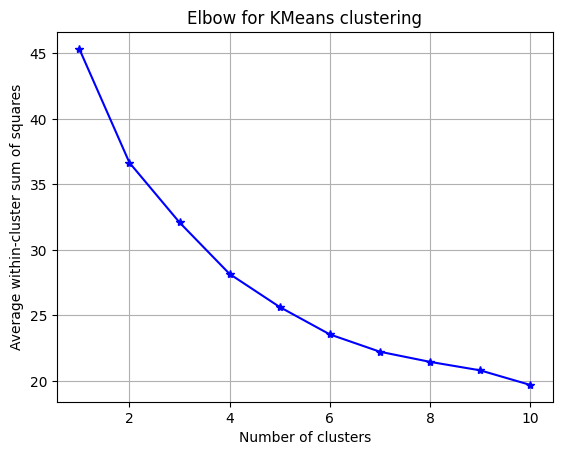

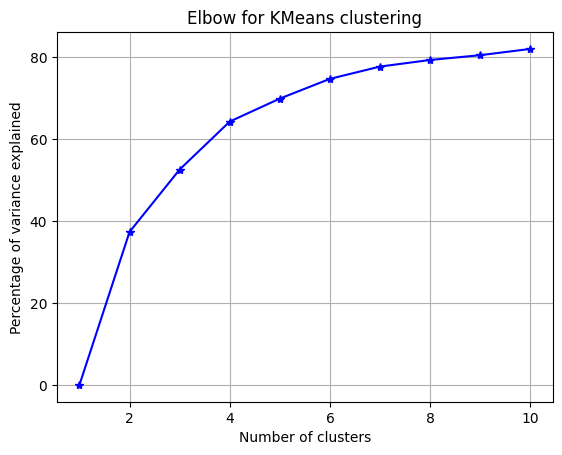

In [ ]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

elbow(train_data,range(1,11))

In [ ]:
# Create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=6, random_state=42)

# Fit the model to the training data
kmeans.fit(train_data)

# Predict the clusters for the train & test data
train_cluster_labels = kmeans.predict(train_data)
test_cluster_labels = kmeans.predict(test_data)

# Evaluate the clustering performance using silhouette score
silhouette_avg = silhouette_score(test_data, test_cluster_labels)

print("Silhouette Score: %.2f" % silhouette_avg)


Silhouette Score: 0.33


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_means = pd.DataFrame(kmeans.cluster_centers_, columns=train_data.columns)

In [ ]:
centroid = kmeans.cluster_centers_[0]
print("Centroid of the first cluster: ", centroid)

Centroid of the first cluster:  [ 1.634375    2.95       42.15       26.49493448 46.009375   26.109375
 51.21991979 37.971875   51.353125   38.8375     57.7125     24.87684255
 15.11875    52.021875   40.303125  ]


In [ ]:
test_data['cluster_label'] = test_cluster_labels
train_data['cluster_label'] = train_cluster_labels

In [ ]:
train_data.groupby('cluster_label')['OOcHU1P'].count()

cluster_label
0    32
1    21
2    33
3    27
4    34
5    18
Name: OOcHU1P, dtype: int64

In [ ]:
test_cluster_labels

array([4, 1, 4, 4, 3, 1, 5, 4, 4, 0, 5, 5, 0, 4, 0, 4, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 0, 0, 2, 1, 1, 4, 1, 1, 1, 1, 1, 4, 4, 4, 3, 4, 0,
       5, 5, 0, 0, 0, 0, 5, 2, 0, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
train_data = train_data.merge(merge[['TOTAL TONS']], left_index = True, right_index = True)
test_data = test_data.merge(merge[['TOTAL TONS']], left_index = True, right_index = True)

In [ ]:
train_data.head(2)

,HOVacRtE,RntVacRtE,OOcHU1P,MdVlE,GRPI35plP,FamChU18P,AvgHHSzE,EA_BchDHP,NtvUSP,EngOnly1P,CvEm16pl1P,MdHHIncE,PBwPvP,FemP,MdAgeE,cluster_label,TOTAL TONS
0,1.7,2.5,31.6,6.959959,43.8,28.8,43.315508,39.5,61.7,46.5,57.4,23.465152,18.2,52.7,37.6,0,6.8
1,2.2,4.0,36.9,16.130822,50.4,31.0,68.983957,22.8,55.0,72.1,55.7,17.389001,19.4,54.2,35.9,2,9.0


In [ ]:
train_result = train_data.groupby('cluster_label')['TOTAL TONS'].agg(['mean', 'std'])
train_result

,mean,std
cluster_label,,
0,435.937500,655.279470
1,205.533333,213.586735
2,977.857576,1038.030465
3,340.974074,358.497209
4,693.294118,618.439408
5,752.916667,901.531053


In [ ]:
test_result = test_data.groupby('cluster_label')['TOTAL TONS'].agg(['mean', 'std'])
test_result

,mean,std
cluster_label,,
0,1286.091667,695.035415
1,705.533333,594.341234
2,1188.700000,1055.491530
3,179.760000,279.526414
4,324.733333,287.638913
5,948.083333,952.945332


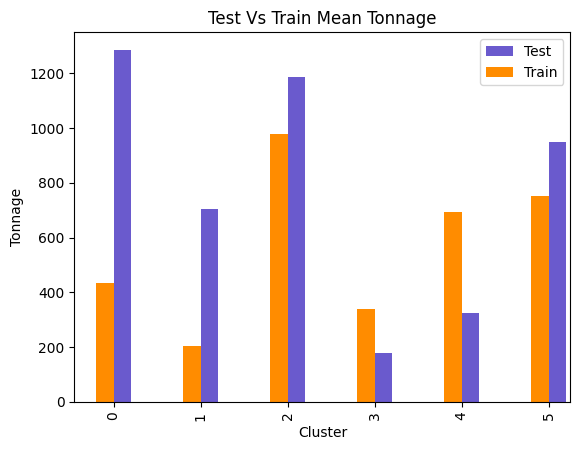

In [ ]:
# create the figure and subplot
fig, ax = plt.subplots(facecolor='white')

# plot Tonnage on the left y-axis
test_result['mean'].plot.bar(ax=ax,color='slateblue', width=0.2, position=0)
train_result['mean'].plot.bar(ax=ax, color='darkorange', width=0.2, position=1)

ax.set_ylabel('Tonnage')
ax.set_xlabel('Cluster')
ax.set_title('Test Vs Train Mean Tonnage' )

# create a legend with custom labels
plt.legend(labels={'Test': 'slateblue', 'Train': 'darkorange'})

# display the plot
plt.show()


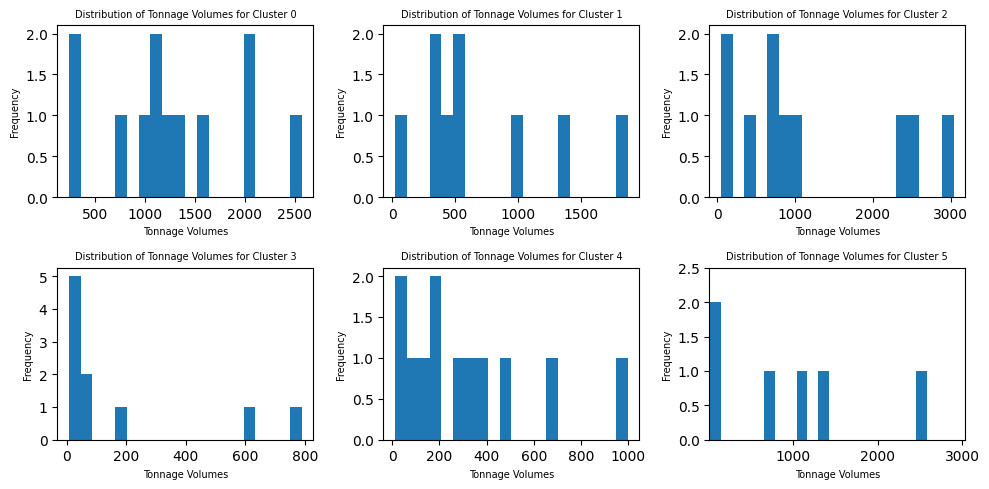

In [ ]:
# Get unique cluster labels from the test data and sort them in ascending order
unique_cluster_labels = np.sort(test_data['cluster_label'].unique())

# Create a figure with 1 row and 6 columns of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

# Determine the minimum and maximum values of the TOTAL TONS column
min_val = test_data['TOTAL TONS'].min()
max_val = test_data['TOTAL TONS'].max()

# Set the same x and y limits for all subplots
plt.xlim(min_val, max_val)
plt.ylim(0, 2.5)

# Loop over the unique cluster labels and plot a histogram for each
for i, cluster_label in enumerate(unique_cluster_labels):
    cluster_data = test_data[test_data['cluster_label'] == cluster_label]
    ax = axs.flat[i]  # Select the appropriate subplot
    ax.hist(cluster_data['TOTAL TONS'], bins=20)
    ax.set_xlabel('Tonnage Volumes',fontsize=7)
    ax.set_ylabel('Frequency',fontsize=7)
    ax.set_title(f'Distribution of Tonnage Volumes for Cluster {cluster_label}', fontsize=7)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
### Append the train and test, resulting the original whole dataframe
df_cl = pd.concat([train_data, test_data], axis=0, ignore_index=False)
df_cl.head(2)

,HOVacRtE,RntVacRtE,OOcHU1P,MdVlE,GRPI35plP,FamChU18P,AvgHHSzE,EA_BchDHP,NtvUSP,EngOnly1P,CvEm16pl1P,MdHHIncE,PBwPvP,FemP,MdAgeE,cluster_label,TOTAL TONS
0,1.7,2.5,31.6,6.959959,43.8,28.8,43.315508,39.5,61.7,46.5,57.4,23.465152,18.2,52.7,37.6,0,6.8
1,2.2,4.0,36.9,16.130822,50.4,31.0,68.983957,22.8,55.0,72.1,55.7,17.389001,19.4,54.2,35.9,2,9.0


In [ ]:
df_cl_result = df_cl.groupby('cluster_label')['TOTAL TONS'].agg(['mean', 'std'])
print(df_cl_result)

                      mean          std
cluster_label                          
0               667.797727   761.465619
1               355.533333   428.039552
2              1026.890698  1033.348185
3               297.402703   342.960891
4               597.147826   572.253521
5               801.708333   897.552692


# Decision Tree & Feature Importance to try to see if we can get better clustering results 

In [ ]:
merge.head()

,HOVacRtE,RntVacRtE,OOcHU1P,MdVlE,GRPI35plP,FamChU18P,AvgHHSzE,EA_BchDHP,NtvUSP,EngOnly1P,CvEm16pl1P,MdHHIncE,PBwPvP,FemP,MdAgeE,Year,BORO_CD,YEAR,TOTAL TONS
0,1.7,2.5,31.6,6.959959,43.8,28.8,43.315508,39.5,61.7,46.5,57.4,23.465152,18.2,52.7,37.6,2016,201,2016,6.8
1,2.2,4.0,36.9,16.130822,50.4,31.0,68.983957,22.8,55.0,72.1,55.7,17.389001,19.4,54.2,35.9,2016,202,2016,9.0
2,1.4,1.5,44.6,11.900572,38.6,24.4,43.850267,25.6,71.9,61.1,53.6,22.501919,12.0,54.1,42.9,2016,203,2016,2.1
3,1.8,2.6,28.4,18.948328,46.9,32.0,63.101604,23.8,56.8,42.7,55.0,17.652242,20.5,51.7,36.0,2016,204,2016,12.4
4,5.3,2.6,7.2,13.903954,51.6,37.5,65.240642,13.1,60.3,36.0,46.2,4.709138,42.7,53.6,29.0,2016,205,2016,7.6


In [ ]:
dt_df = merge.drop (columns = ['Year', 'YEAR', 'BORO_CD'])
dt_df.head()

,HOVacRtE,RntVacRtE,OOcHU1P,MdVlE,GRPI35plP,FamChU18P,AvgHHSzE,EA_BchDHP,NtvUSP,EngOnly1P,CvEm16pl1P,MdHHIncE,PBwPvP,FemP,MdAgeE,TOTAL TONS
0,1.7,2.5,31.6,6.959959,43.8,28.8,43.315508,39.5,61.7,46.5,57.4,23.465152,18.2,52.7,37.6,6.8
1,2.2,4.0,36.9,16.130822,50.4,31.0,68.983957,22.8,55.0,72.1,55.7,17.389001,19.4,54.2,35.9,9.0
2,1.4,1.5,44.6,11.900572,38.6,24.4,43.850267,25.6,71.9,61.1,53.6,22.501919,12.0,54.1,42.9,2.1
3,1.8,2.6,28.4,18.948328,46.9,32.0,63.101604,23.8,56.8,42.7,55.0,17.652242,20.5,51.7,36.0,12.4
4,5.3,2.6,7.2,13.903954,51.6,37.5,65.240642,13.1,60.3,36.0,46.2,4.709138,42.7,53.6,29.0,7.6


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

y = dt_df['TOTAL TONS']
X = dt_df.iloc[:,:-1]

X.columns = ['h_homevacrate',  'h_rentvacrate', 'h_ownoccratio', 'h_medvalue', 'h_housingburden35', 's_familywithchildren',  's_avghhsize', 's_bachelorhigher', 's_nativeus', 's_englishspeaking', 'e_employed', 'e_medincome', 'e_belowpoverty', 'd_female',  'd_medage']
    
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.26, random_state=999)

# Create a decision tree regressor
tree = DecisionTreeRegressor(random_state=0)

# Fit the model
tree.fit(X_train, y_train)

# Get the feature importances
importances = tree.feature_importances_

# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

# Print the feature importances
for i in range(X_train.shape[1]):
    print(f"{i+1}. {X_train.columns[indices[i]]}: {importances[indices[i]]}")

1. h_ownoccratio: 0.2717655092333477
2. s_englishspeaking: 0.23251228901657406
3. s_bachelorhigher: 0.09950541864562512
4. h_rentvacrate: 0.09162628830025919
5. s_avghhsize: 0.0806829190271427
6. s_familywithchildren: 0.05088498707370449
7. d_female: 0.04321152272607065
8. d_medage: 0.042853600246981705
9. h_medvalue: 0.029236177983215653
10. h_housingburden35: 0.028071364310812592
11. e_belowpoverty: 0.01687142344068931
12. s_nativeus: 0.006920281403603359
13. e_medincome: 0.004407451505596486
14. h_homevacrate: 0.0009086044909779463
15. e_employed: 0.0005421625953989993


In [ ]:
# learn model
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

# in sample accuracy
print('In sample accuracy:',dt.score(X_train, y_train))

# out of sample accuracy
print('Out of sample accuracy:',dt.score(X_test, y_test))

In sample accuracy: 1.0
Out of sample accuracy: -0.29382069856050963


Rerunning Kmeans with important features


In [ ]:
train_data_dt = train_data [['OOcHU1P', 'FemP','EngOnly1P', 'AvgHHSzE', 'RntVacRtE' , 'FamChU18P' , 'MdAgeE' , 'EA_BchDHP' ]]
test_data_dt = test_data[['OOcHU1P', 'FemP','EngOnly1P', 'AvgHHSzE', 'RntVacRtE' , 'FamChU18P' , 'MdAgeE' , 'EA_BchDHP' ]]

In [ ]:
# Loop through each value of k and compute the silhouette score
k_values = range(2, 11)
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(train_data_dt)
    silhouette_scores.append(silhouette_score(train_data_dt, cluster_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
silhouette_scores

[0.34142856320857123,
 0.32204744920923445,
 0.358401533615234,
 0.37226158844958745,
 0.38641207806314676,
 0.39758358743724476,
 0.38882705301013104,
 0.39231383912626155,
 0.39677506095713794]

7 clusters is optimal

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

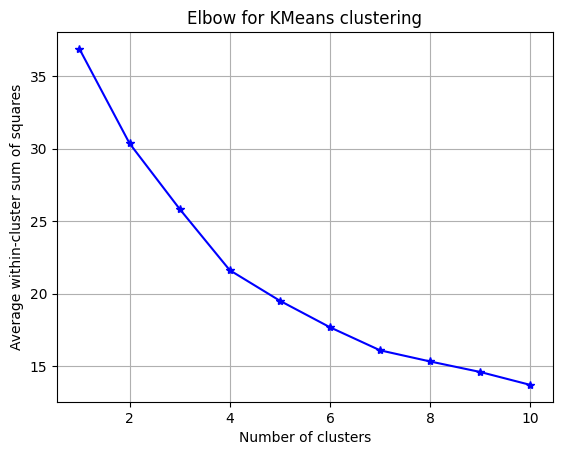

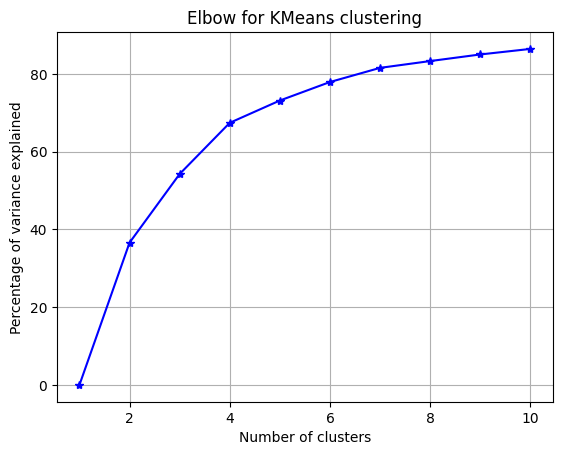

In [ ]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

elbow(train_data_dt,range(1,11))

In [ ]:
# Create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=7, random_state=42)

# Fit the model to the training data
kmeans.fit(train_data_dt)

# Predict the clusters for the train & test data
train_cluster_labels = kmeans.predict(train_data_dt)
test_cluster_labels = kmeans.predict(test_data_dt)

# Evaluate the clustering performance using silhouette score
silhouette_avg = silhouette_score(test_data_dt, test_cluster_labels)

print("Silhouette Score: %.2f" % silhouette_avg)


Silhouette Score: 0.36


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#we see a slightly higher silhouette score when we select important features

In [ ]:
test_data_dt['cluster_label'] = test_cluster_labels
train_data_dt['cluster_label'] = train_cluster_labels

<ipython-input-66-c66cedbddb97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_dt['cluster_label'] = test_cluster_labels
<ipython-input-66-c66cedbddb97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_dt['cluster_label'] = train_cluster_labels


In [ ]:
train_data_dt = train_data_dt.merge(merge[['TOTAL TONS']], left_index = True, right_index = True)
test_data_dt = test_data_dt.merge(merge[['TOTAL TONS']], left_index = True, right_index = True)


In [ ]:
train_result = train_data_dt.groupby('cluster_label')['TOTAL TONS'].agg(['mean', 'std'])
train_result

,mean,std
cluster_label,,
0,393.760000,414.331174
1,335.895000,540.835294
2,470.122222,594.006009
3,727.051515,716.710388
4,205.533333,213.586735
5,752.916667,901.531053
6,1226.176190,1106.007359


In [ ]:
test_result = test_data_dt.groupby('cluster_label')['TOTAL TONS'].agg(['mean', 'std'])
test_result

,mean,std
cluster_label,,
0,179.100000,279.957723
1,1583.025000,580.157118
2,574.788889,435.304297
3,495.470000,732.851289
4,705.533333,594.341234
5,948.083333,952.945332
6,1204.500000,1092.175570


graphing the difference in mean 

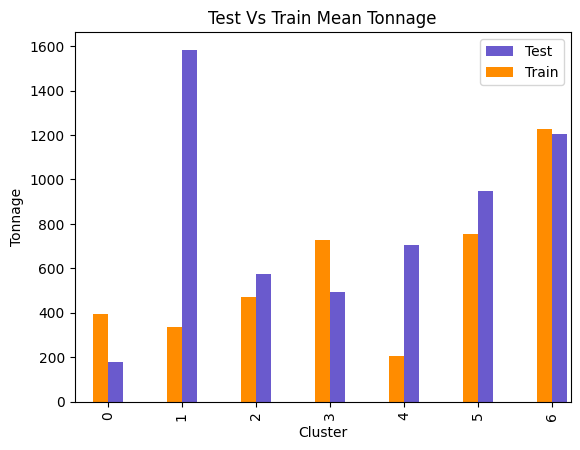

In [ ]:
# create the figure and subplot
fig, ax = plt.subplots(facecolor='white')

# plot Tonnage on the left y-axis
test_result['mean'].plot.bar(ax=ax,color='slateblue', width=0.2, position=0)
train_result['mean'].plot.bar(ax=ax, color='darkorange', width=0.2, position=1)

ax.set_ylabel('Tonnage')
ax.set_xlabel('Cluster')
ax.set_title('Test Vs Train Mean Tonnage' )

# create a legend with custom labels
plt.legend(labels={'Test': 'slateblue', 'Train': 'darkorange'})

# display the plot
plt.show()


In [ ]:
#higher silhouette score using selected features 
df_cl = pd.concat([train_data_dt, test_data_dt], axis=0, ignore_index=False)
df_cl.head(2)

,OOcHU1P,FemP,EngOnly1P,AvgHHSzE,RntVacRtE,FamChU18P,MdAgeE,EA_BchDHP,cluster_label,TOTAL TONS
0,31.6,52.7,46.5,43.315508,2.5,28.8,37.6,39.5,2,6.8
1,36.9,54.2,72.1,68.983957,4.0,31.0,35.9,22.8,3,9.0


In [ ]:
### PLOT

<Axes: >

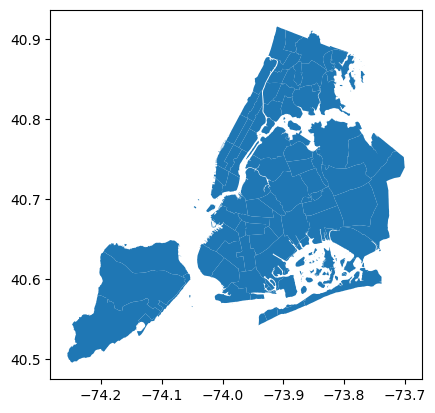

In [ ]:
import geopandas as gpd
gdf = gpd.read_file('Datasets/geo_export_bac43b83-a863-4e49-9a8a-58786b35daf3.shp')
gdf.plot()

In [ ]:
df_cl = df_cl.merge(merge[['BORO_CD', 'YEAR']], left_index = True, right_index=True)
gdf_cluster = gdf.merge(df_cl, left_on ='boro_cd', right_on='BORO_CD', how='left')

In [ ]:
import matplotlib as mpl
sns.reset_orig()
sns.reset_defaults()
mpl.rcParams.update(mpl.rcParamsDefault)

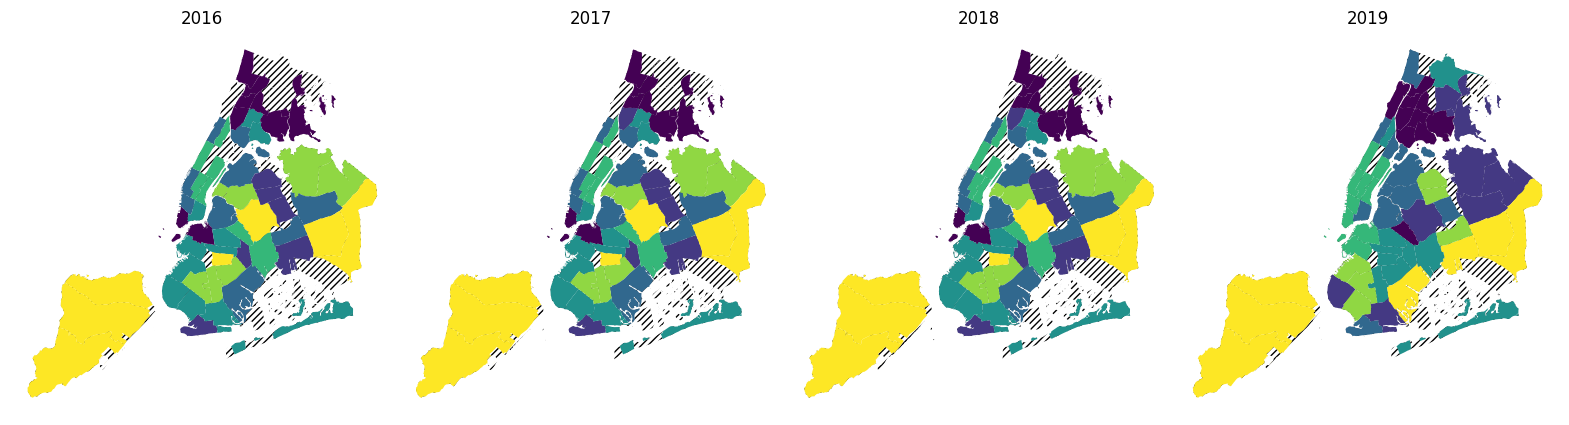

In [ ]:
from matplotlib.lines import Line2D
fig, axs = plt.subplots(1, 4, figsize=(20, 6))
cmap = 'tab10'
fig.patch.set_facecolor('white')

gdf.plot(ax=axs[0], hatch='/////', color='w', edgecolor= None)
gdf_cluster[gdf_cluster['YEAR'] == 2016].plot(column='cluster_label', ax=axs[0], legend=False)
axs[0].set_title('2016')

gdf.plot(ax=axs[1], hatch='/////', color='w', edgecolor=None)
gdf_cluster[gdf_cluster['YEAR'] == 2017].plot(column='cluster_label', ax=axs[1], legend=False)
axs[1].set_title('2017')

gdf.plot(ax=axs[2], hatch='/////', color='w', edgecolor=None)
gdf_cluster[gdf_cluster['YEAR'] == 2018].plot(column='cluster_label', ax=axs[2], legend=False)
axs[2].set_title('2018')

gdf.plot(ax=axs[3], hatch='/////', color='w', edgecolor=None)
gdf_cluster[gdf_cluster['YEAR'] == 2019].plot(column='cluster_label', ax=axs[3], legend=False)
axs[3].set_title('2019')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[3].axis('off')

plt.subplots_adjust(wspace=0.01)
plt.show()


In [ ]:
# CLUSTER CHARACTERISTIC

In [ ]:
# TONNAGE
cl_ton = df_cl[['TOTAL TONS']]
cl_ton = cl_ton.join(df_cl.cluster_label)

cl_ton = cl_ton.groupby(['cluster_label']).mean()
cl_ton

,TOTAL TONS
cluster_label,
0,332.428571
1,692.217857
2,496.288889
3,673.195349
4,355.533333
5,801.708333
6,1220.757143


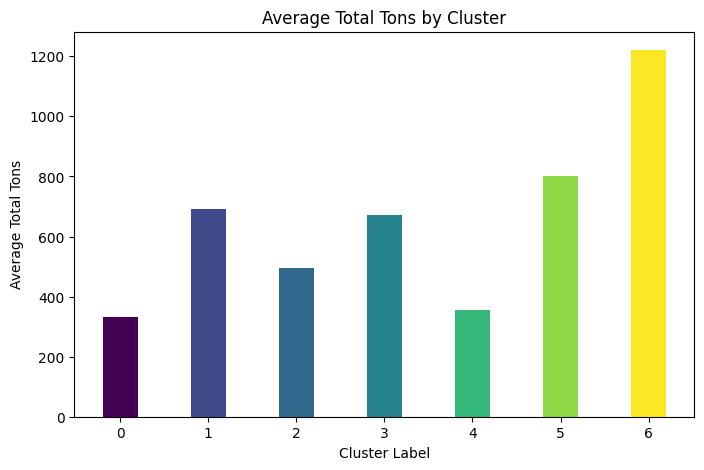

In [ ]:
colors = ['#440154', '#3e4a89', '#31688e', '#26838f', '#35b779', '#8fd744', '#fde725']

# Plot the bar chart
fig, ax = plt.subplots(figsize=(8, 5))
for i, (index, row) in enumerate(cl_ton.iterrows()):
    ax.bar(index, row, color=colors[i], width=0.4, align='center', label=index)

# Set x-axis and y-axis labels, and title
ax.set_xlabel('Cluster Label')
ax.set_ylabel('Average Total Tons')
ax.set_title('Average Total Tons by Cluster')


# Show the plot
plt.show()


# Putting all data on one graph

<ipython-input-90-aeca1b85ef6d>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Owner Occupied', '%Female', 'English Sp Only', 'Avg Household Sz'  , 'Rental Vac Rate', 'With Children', 'Median Age', 'Bachelors or Higher'])


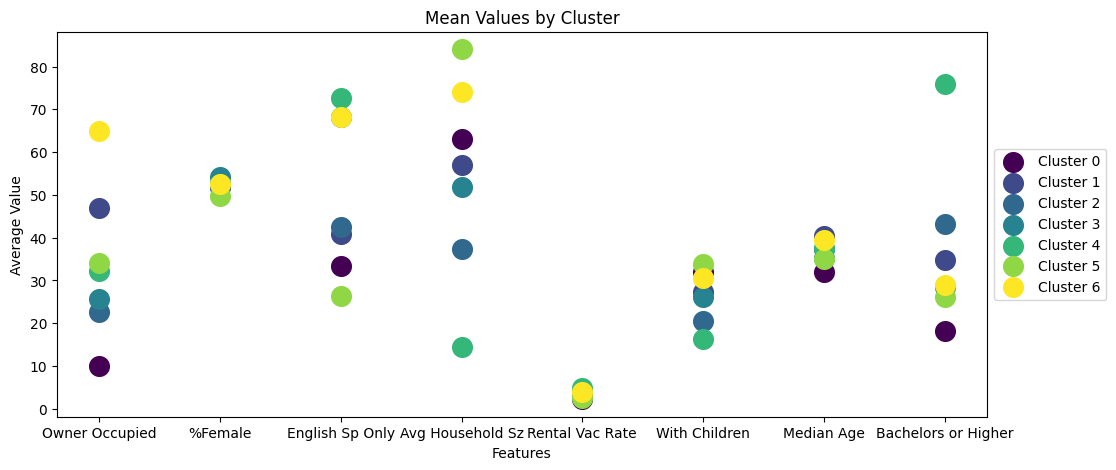

In [ ]:


# Get the data for each variable by cluster

cl_mean = df_cl.groupby(['cluster_label']).mean()
cl_mean = cl_mean.iloc[:,:-3]
# define a list of colors to use for each cluster
#colors = ['dodgerblue', 'slateblue', 'salmon', 'darkorange', 'mediumseagreen']
colors = ['#440154','#3e4a89','#31688e', '#26838f', '#35b779','#8fd744', '#fde725']

# plot the scatter chart
fig, ax = plt.subplots(figsize=(12, 5))
for i, (index, row) in enumerate(cl_mean.iterrows()):
    ax.scatter(row.index, row.values, s=200, color=colors[i], label=f'Cluster {index}')

# set the x-axis label
ax.set_xlabel('Features')
ax.set_xticklabels(['Owner Occupied', '%Female', 'English Sp Only', 'Avg Household Sz'  , 'Rental Vac Rate', 'With Children', 'Median Age', 'Bachelors or Higher'])


# set the y-axis label
ax.set_ylabel('Average Value')

# set the title of the plot
ax.set_title('Mean Values by Cluster')

# show the legend
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# display the plot
plt.show()
